Pyloric Rhythm Similarity Criteria:
1. All three neurons oscillate
2. In every cycle (AB/PD start to next AD/PD start), LP begins before PY starts and ends before PY ends, AB/PD finishes before LP starts
3. Duty cycles (relative length of each burst to the total length of the cycle) are similar to experimental averages(Prinz et al., 2004)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import math
from CTRNNclass import *
from pyloricfitness import *
from SampleGenerators import *
from HPCTRNNevolution import *
import pickle

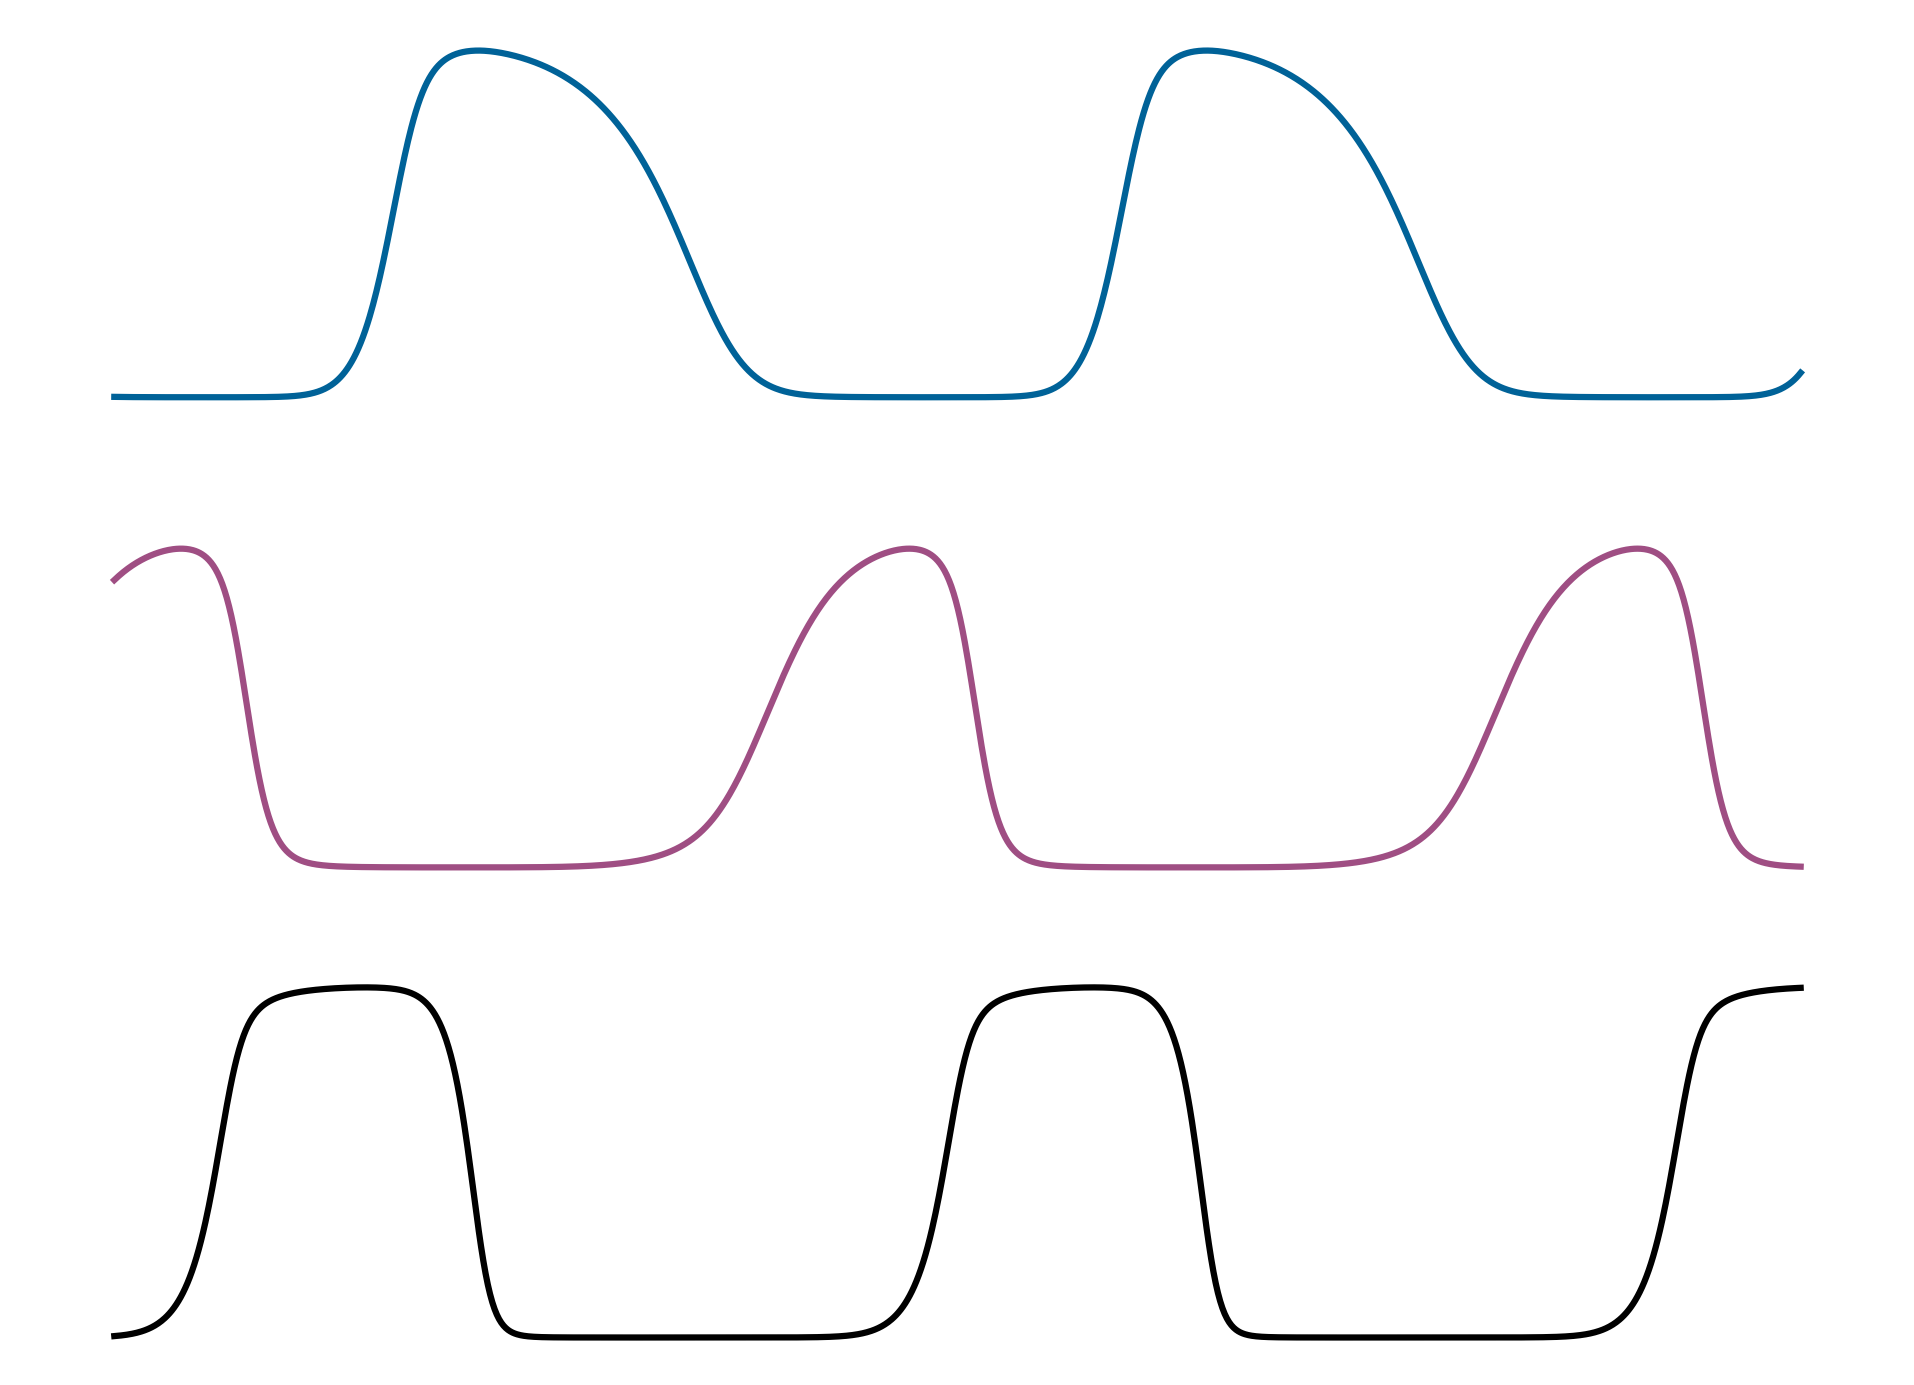

In [34]:
# making analagy figure

weights = np.array([1.25966, 11.7919 ,-8.9466 ,-14.1082 ,13.505 ,15.8346, -4.73326 ,-14.9413, 7.13229])
biases = np.array([2.68606, -5.92321 ,-8.09309])
timeconstants = np.array([1.0782 ,1.45534 ,1.713])

neurongenome = np.concatenate((weights,biases,timeconstants),axis=None)
HPgenome = np.array([.25,.25,.25,.75,.75,.75,40,20,200])
duration = 500
dt = .01
C2 = CTRNN(3,dt,duration,HPgenome,neurongenome)
initial_states = np.array([3.,3.,3.])  #initial states of the neurons
C2.initializeState(initial_states)
C2.resetStepcount()
HPon = 0
for i in range(int(duration/dt)):
    C2.ctrnnstep(HPon)
start = -1500
thresh = np.ones(-start)*.5
wide = C2.time[start:]
fig,(ax1,ax2,ax3) = plt.subplots(3,1,dpi=300,figsize=(7,5),frameon=False,sharex=True,sharey=True)
fig.tight_layout()
ax2.plot(C2.time[start:],C2.ctrnn_record[0,start:],label="LP",color='#9f4e83')
#ax2.fill_between(wide,thresh,color='#d6d6d6')
ax3.plot(C2.time[start:],C2.ctrnn_record[1,start:],label="PY",color='k')
#ax3.fill_between(wide,thresh,color='#d6d6d6')
ax1.plot(C2.time[start:],C2.ctrnn_record[2,start:],label="PD",color='#006298') 
#ax1.fill_between(wide,thresh,color='#d6d6d6')  
ax1.axis('off') 
ax2.axis('off')
ax3.axis('off')
plt.show()  
# plt.scatter(np.array([48441 , 48615 , 48591 , 48815 , 48100 , 48348])*0.01,[.5,.5,.5,.5,.5,.5])
# plt.legend()
#C2.plot()
#C2.plotparams()
#pyloriclike(neurongenome,debugging=True)


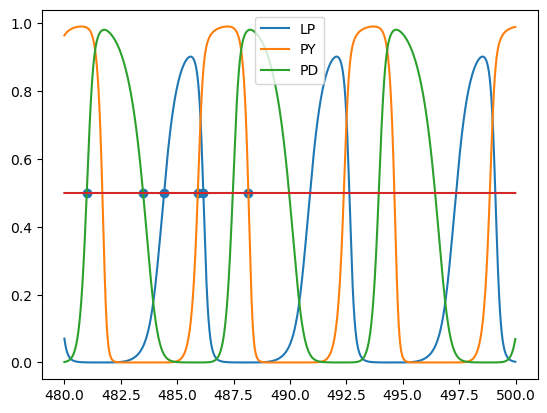

LP 23844 , 24018  PY 23993 , 24218  PD 23502 , 23751
LPdutycyclezscore  0.08361931207921834
PYdutycyclezscore  0.004465052378498451
PDdutycyclezscore  0.0036707882534778302
LPstartphasezscore  0.08160169443013385
PYstartphasezscore  0.01478619268418339


26.875524689284884

In [3]:
# test adaptive CTRNN class
# weights = np.array([[6.60946,1.14559,-6.51152],[10.6385,1.19458,1.34445],[16,1.26722,1.663]])
# biases = np.array([-13.1741,-1.54257,-0.114027])
# timeconstants = np.array([9.42607,2.41159,7.85833])
# weights = np.transpose(np.array([4.24602, 11.8124 ,12.4259, -5.34179, -8.91089 ,7.77379 ,-10.0239, 0.799534, 6.90232]))
# biases = np.array([7.36221 ,-1.29373 ,-12.1857])
# timeconstants = np.array([1.78557, 1.30213 ,2])

# weights = np.reshape(np.array([8.01334, 11.5429 ,-3.46122, -12.5832 ,0.57023, -11.4816, 16, -6.79885, -8.07067]),(3,3))
# biases = np.array([-3.75806, -0.510943, 6.87966 ])
# timeconstants = np.array([1.09804 ,1.95277 ,1.1016])

weights = np.array([1.25966, 11.7919 ,-8.9466 ,-14.1082 ,13.505 ,15.8346, -4.73326 ,-14.9413, 7.13229])
biases = np.array([2.68606, -5.92321 ,-8.09309])
timeconstants = np.array([1.0782 ,1.45534 ,1.713])

neurongenome = np.concatenate((weights,biases,timeconstants),axis=None)
HPgenome = np.array([.25,.25,.25,.75,.75,.75,40,20,200])
duration = 500
dt = .01
C2 = CTRNN(3,dt,duration,HPgenome,neurongenome)
initial_states = np.array([3.,3.,3.])  #initial states of the neurons
C2.initializeState(initial_states)
C2.resetStepcount()
HPon = 0
for i in range(int(duration/dt)):
    C2.ctrnnstep(HPon)
plt.plot(C2.time[-2000:],C2.ctrnn_record[0,-2000:],label="LP")
plt.plot(C2.time[-2000:],C2.ctrnn_record[1,-2000:],label="PY")
plt.plot(C2.time[-2000:],C2.ctrnn_record[2,-2000:],label="PD")   
plt.plot(C2.time[-2000:],np.ones(2000)*.5)   
plt.scatter(np.array([48441 , 48615 , 48591 , 48815 , 48100 , 48348])*0.01,[.5,.5,.5,.5,.5,.5])
plt.legend()
plt.show()
#C2.plot()
#C2.plotparams()
pyloriclike(neurongenome,debugging=True)


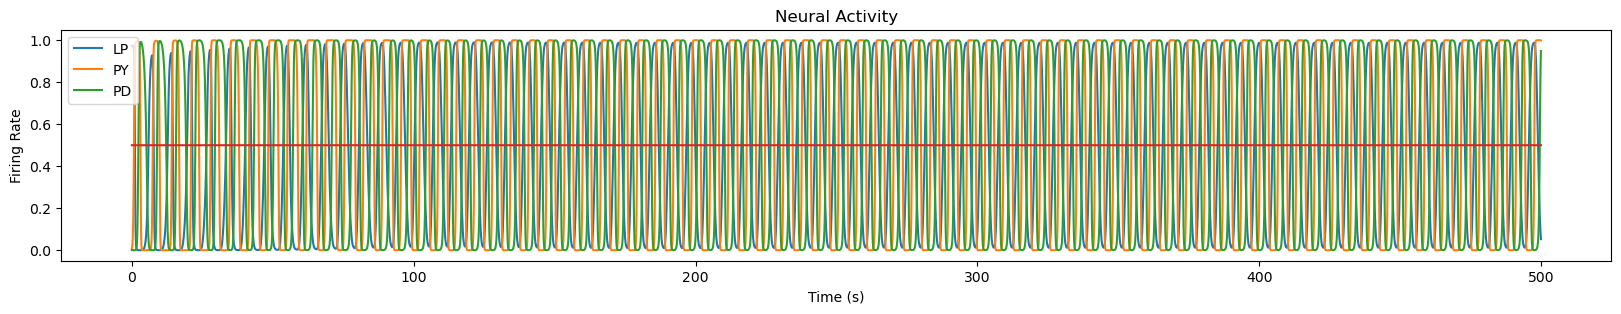

0.986431290895428 0.015197678977969312
0.9999407432332655 2.980235970230048e-05
0.9992437117540813 0.0007038426412997652
New Pyloric fitness 0.392952348945817


In [5]:
HP = 1

#test any CTRNN for pyloric fitness and plot
# weights = np.array([[13.47792516,  10.59233265, -15.04646692],[-15.97458819,   5.7376846,   -5.37480922],[-2.20731148, -11.07581759,  -3.1880527]])
# biases = np.array([-0.39843736, -6.68032731,  2.26812979])
# timeconstants = 1/np.array([0.14892103, 0.12300845, 0.25616658])

# weights = np.array([[-3.7789188,7.93029945,  1.36994916],[ -2.03197829,  9.41483729,  4.63459765],[ -6.44862027, -4.45381504, -1.80992267]])
# biases = np.array([ 5.43154491 ,-6.44566085, -2.35101064])
# timeconstants = 1/np.array([1.66586038 , 1.202376  ,  1.17894711])


#doubly periodic, how should I deal with them?
# weights = [[ 15.13420671 , 11.55247725, -12.01615767], [ -5.12504622, -16.72510022
#  , 15.59766673],[  15.21115945,   1.58408748 ,  1.22617987 ]] 
# biases = [-9.82697962,  -0.60614873  ,-1.96484597]   
# timeconstants = [1.13091869 ,  4.00518322  , 3.57617411]

neurongenome = np.concatenate((weights,biases,timeconstants),axis=None)
# HPoffgenome = np.ones(2*3+3)
# HPoffgenome[0:3] = 0
HPongenome = [.25,.25,.25,.75,.75,.75,40,20,1]
#print('Pyloric fitness',pyloriclike(neurongenome))
C1 = CTRNN(3,.1,500,HPongenome,neurongenome)
for i in range(len(C1.time)):        #run the CTRNN for the allotted duration
    C1.ctrnnstep(HP)
C1.plot()

print('New Pyloric fitness', pyloricfitness(neurongenome))

Microbial Evolutionary Algorithm

In [2]:
recombProb = 0
mutatProb = .1
generations = 50
popsize = 50

runs = 5

bestinds = np.zeros(runs)

#evolve for pyloric fitness *with* the generic HP mechanism ([.25,.75],40,20) applied to all neurons
for i in range(runs):
    print("Evolutionary Run ",i,":")
    CTRNNpop = randomCTRNNsample(3,popsize,center_crossing = True)  #seeding with center crossing networks
    M = MicrobialCTRNN(pyloriclikewithHP, CTRNNpop, recombProb, mutatProb, generations)
    M.run()
    bestinds[i] = M.save('Evolution%s'%i)

Evolutionary Run  0 :


KeyboardInterrupt: 

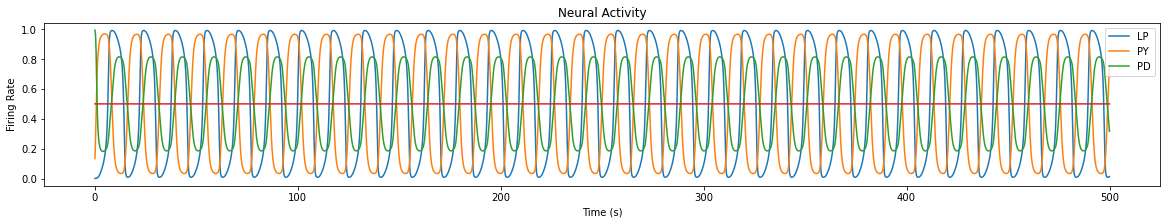

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


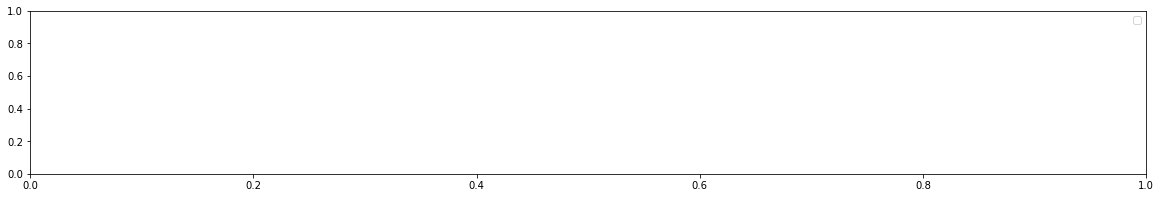

NameError: name 'bestinds' is not defined

In [5]:
CTRNNsize = 3
HP = 0 #HP on or off
HPgenome = HPoff

runidx = 1
data = np.load('Evolution%s.npz'%runidx)
bestind = data['bestind']

C= CTRNN(3,.025,500,HPgenome,bestind)
for i in range(len(C.time)):        #run the CTRNN for the allotted duration
    C.ctrnnstep(HP)
C.plot()
#xvals = np.array([9934, 9948, 9958, 9966, 9958, 9974])-(np.ones(6)*(duration/dt)).astype(int)
#print(xvals[1])
#plt.scatter(xvals+200,(np.ones(6)*.5))
plt.legend()
plt.show()

print("Pyloric Fitness=", pyloriclike(bestinds[runidx])) #redundant to simulate twice but eh

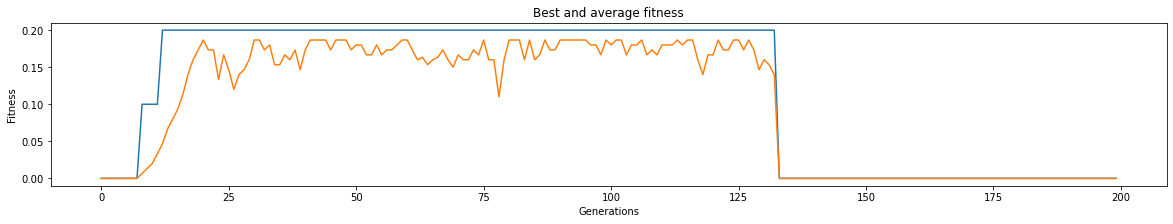

In [ ]:
for i in range(runs):
    data = np.load('Evolution%s.npz'%i)
    plt.plot(np.arange(generations),data['besthist'])
plt.title('Best Individuals Over Generations')
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

Local fitness landscape around one successful solution: sample fitness of solutions in a 15-D grid around the point 

    1. Which directions are the most "flexible"? - holding the other 14 parameters of the solution constant, which parameter has the steepest fitness dropoff? Which requires the least change before the rhythm is no longer pyloric-like at all?
    2. Visualize the local fitness landscape in several planes

In [4]:
#a = [14.82024187,  10.61253584] #original w11 and w12 of sol1
# sol1 = np.array([ 14.82024187,  10.61253584,-12.15141158,  -4.61967513,-15.81543225,  15.62745189,  14.71262429,   2.0523492 , 1.86045721, -10.25813196,  -0.29218389,  -2.47607644, 1.13091869,   4.00518322,   3.57617411])
#the original solution 1 used to make plots is apparently not quite pyloric under the fitness function anymore... don't know how it happened
# sol1 = 
# sol2 = np.array([13.47792516,  10.59233265, -15.04646692,-15.97458819,   5.7376846,   -5.37480922,-2.20731148, -11.07581759,  -3.1880527,-0.39843736, -6.68032731,  2.26812979,1/0.14892103, 1/0.12300845, 1/0.25616658])
#print(pyloriclike(sol1))
sol2 = neurongenome
print(pyloriclike(sol2))


26.875524689284884


In [11]:
dropoffs = np.zeros((15,2))
for dim in range(15):
    newsol = np.copy(sol2)
    fitness = pyloriclike(newsol)
    while fitness > .15:
        newsol[dim] += 2
        fitness = pyloriclike(newsol)
        #print(fitness)
    dropoffs[dim,1] = newsol[dim]
    newsol = np.copy(sol2)
    fitness = pyloriclike(newsol)
    while fitness > .15:
        newsol[dim] -= .5
        fitness = pyloriclike(newsol)
        #print(fitness)
    dropoffs[dim,0] = newsol[dim]

/Users/LJSbo/Documents/School/Research/GitHub/PyloricCTRNNHomeostasis/CTRNNclass.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


KeyboardInterrupt: 

In [12]:
dropoffssol2 = dropoffs
dropoffs[:,1]-dropoffs[:,0]
print(dropoffssol2)
widths = (dropoffssol2[:,1] - dropoffssol2[:,0])/.5 #how many steps of .5 in each direction
print(widths)

[[-4.74034 21.25966]
 [ 2.2919  73.7919 ]
 [ 0.       7.0534 ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]]
[ 52.     143.      14.1068   0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.    ]


In [ ]:
dim1lb = 6
dim1ub = 16
dim2lb = 6
dim2ub = 16
spacing = .1 #(must go evenly into both the interval widths)

#widthvals = np.array([0.8 , 2.1 , 1.5 , 0.1 , 1.3 , 1.2 , 2.45, 0.65, 0.45, 0.5 , 0.35, 0.3 , 1.15, 0.2 , 6.75])
#widths = widthvals/.01
#widths = widths.astype(int) + 1 #number of points spaced .05 apart on each dimension if the bookends are not pyloric-like

dim1 = 0 #index of par on x axis
dim2 = 1 #index par on y axis
fitnessgridsol2 = np.zeros((int((dim1ub-dim1lb)/spacing),int((dim2ub-dim2lb)/spacing)))#w21 vs b1
genome = np.copy(sol2)
genome[dim1] = dim1lb  #start the genome at the edge of both axes
for i in range(int((dim1ub-dim1lb)/spacing)):
    genome[dim2] = dim2lb 
    for j in range(int((dim2ub-dim2lb)/spacing)):
        fitnessgridsol2[i,j] = pyloriclike(genome,0)
        genome[dim2] += spacing       #and increment it with each loop
    genome[dim1] += spacing           
#print(fitnessgridsol1_1)

[ 14.2         14.         -12.15141158  -4.61967513 -15.81543225
  15.62745189  14.71262429   2.0523492    1.86045721 -10.25813196
  -0.29218389  -2.47607644   1.13091869   4.00518322   3.57617411]
possible double-periodicity
[ 14.4         14.         -12.15141158  -4.61967513 -15.81543225
  15.62745189  14.71262429   2.0523492    1.86045721 -10.25813196
  -0.29218389  -2.47607644   1.13091869   4.00518322   3.57617411]
possible double-periodicity


In [10]:
f = open('fitnessgridsol2','rb')
fitnessgrid = pickle.load(f)

UnpicklingError: unpickling stack underflow

NameError: name 'fitnessgridsol1_2' is not defined

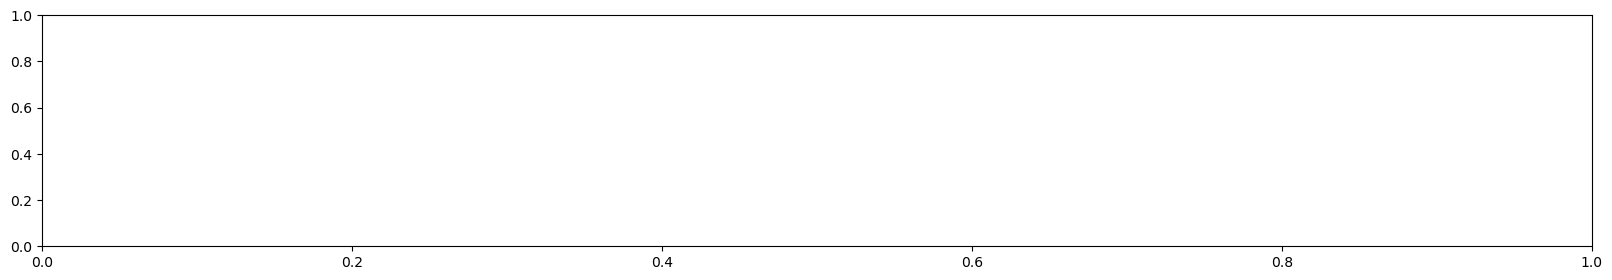

In [5]:
cmap = cm.summer
fig, ax2 = plt.subplots(ncols=1)

#norm = colors.BoundaryNorm((0,.3,.6,.61,.62,.63,.64,.65,.66,.67,.68,.69,.7,.8,.9,1), ncolors=cmap.N, clip=True) #scaled to show extra pyloricness
norm = colors.BoundaryNorm((0,.0501,.101,.1501,.201,.2501,.301,1), ncolors=cmap.N, clip=True) #scaled to show oscillation and ordering


pc = ax2.pcolormesh(fitnessgridsol1_2, norm=norm, cmap=cmap)
fig.colorbar(pc, ax=ax2)
fig.set_figheight(10)
fig.set_figwidth(17)
ax2.set_title(r'$w_{12}$ vs $w_{11}$ between [6,16] and [6,16]')
ax2.set_ylabel(r'$w_{11}$')
ax2.set_xlabel(r'$w_{12}$')
xticks = np.arange(0,(int((dim2ub-dim2lb)/spacing))+1)
ax2.set_xticks(xticks)
xticklabels = np.round(np.arange(dim2lb,dim2ub+0.0001,spacing),3)
ax2.set_xticklabels(xticklabels,rotation = 90)
ax2.tick_params(axis='both', which='major', labelsize=7)
yticks = np.arange(0,(int((dim1ub-dim1lb)/spacing))+1)
ax2.set_yticks(yticks)
yticklabels = np.round(np.arange(dim1lb,dim1ub+0.0001,spacing),3)
ax2.set_yticklabels(yticklabels)

plt.show()



Investigate the pyloric failure just outside of each of the boundaries (at points indicated above)